# Complexity scattering for fine-tuned and original models

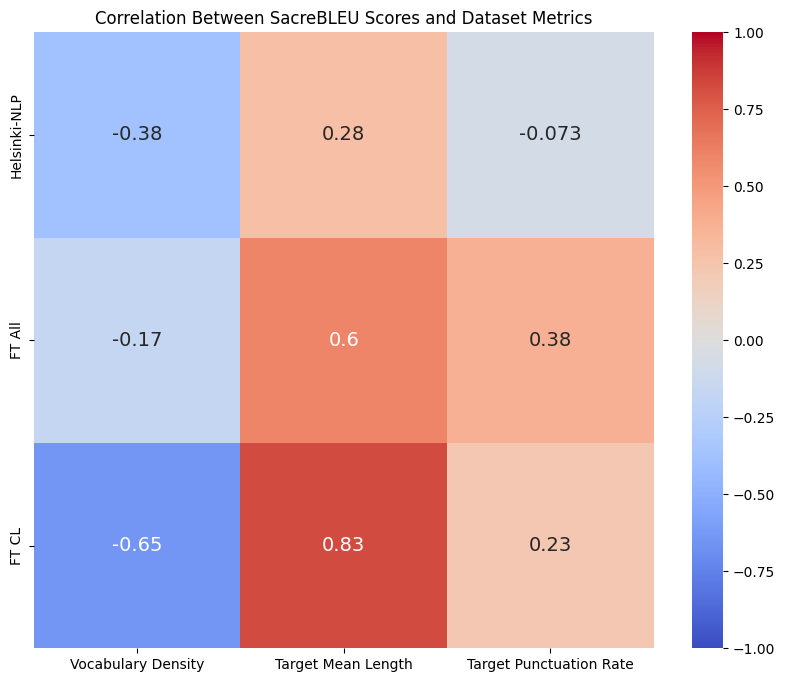

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Dataset properties
dataset_names = ['clinspen-te', 'hpo', 'khresmoi-te', 'orphanet-definitions-te', 'pubmed-te']
target_vocab_sizes = [4893, 10776, 3324, 7796, 5563]
target_lengths = [5.5, 4.9, 20.5, 56.7, 26.9]
number_pairs = [2519, 17875, 500, 703, 699]
target_punctuation_rates = [0.09, 0.01, 0.09, 0.13, 0.12]
vocab_density = [v / (n * l) for v, n, l in zip(target_vocab_sizes, number_pairs, target_lengths)]

# Dataset SacreBLEU scores
original_sacrebleu = [39, 47.8, 49.5, 46.3, 48.4]
finetuned_all_sacrebleu = [54.5, 48.7, 47.9, 61.4, 45.9]
finetuned_cl_sacrebleu = [40.7, 49.8, 48.5, 57.7, 48.2]

data = {
    'Target Vocab Size': target_vocab_sizes,
    'Target Mean Length': target_lengths,
    'Target Punctuation Rate': target_punctuation_rates,
    'Vocabulary Density': vocab_density,
    'Helsinki-NLP': original_sacrebleu,
    'FT All': finetuned_all_sacrebleu,
    'FT CL': finetuned_cl_sacrebleu
}

df = pd.DataFrame(data, index=dataset_names)

corr_subset = df[
    ['Vocabulary Density', 'Target Mean Length', 'Target Punctuation Rate', 'Helsinki-NLP', 'FT All', 'FT CL']].corr()

# Extract correlations related to SacreBLEU scores
sacrebleu_corr = corr_subset.loc[
    ['Helsinki-NLP', 'FT All', 'FT CL'], ['Vocabulary Density', 'Target Mean Length', 'Target Punctuation Rate']]

# Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(sacrebleu_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 14})
plt.title('Correlation Between SacreBLEU Scores and Dataset Metrics')
plt.show()